Ο σκοπός της εργασίας: Σκοπός της εργασίας είναι ο χρήστης να επιλέξει ένα τραγούδι από το dataset και να το εμφανιστούν τραγούδια τα οποία είναι κοντά στο τραγούδι που διάλεξε.Το συγκεκριμένο έγινε πράξη χρησιμοποιώντας των αλγόριθμο k-means.
Αρχικά απο το dataset έκανα drop τα columns που δεν θα χρειαστούν,κρατώντας μόνο  (danceability  speechiness  acousticness  instrumentalness  liveness) δηλαδή τα audio features.
Στην συνέχεια με τον υπολογισμό του elbow method βρίσκουμε τον αριθμό των clusters για να τρέξουμε το k-means στην καλύτερη περίπτωση (χρησιμοποιώντας τυχαία cendroids).
Τέλος αφου τρέξουμε τον k-means δημιουργούμε dataframes για κάθε cluster


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Desktop/top2018.csv') #Κανουμε import το dataset

In [3]:
data.describe() # μας δίνει κάποια γενικά στατιστικά του dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [4]:
data.head() # εμφανίζει τα πρώτα rows του dataset 

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [5]:
name = list(data.iloc[:,1]) #δημιουργία λίστας με τα ονόματα καθώς θα τα χρησιμοποίσουμε αργότερα αφου αυτα θα είναι το όρισμα του χρήστη 
x=data.iloc[:,[3,8,9,10,11,]].values #εδώ έχουμε το dataset που χρειαζόμαστε έχουμε κρατήσει μόνο τα columns για να γίνει σωστά το clustering.Πάνω σε αυτό το dataset εφαρμόζουμε k-means 

In [6]:
print(name)

["God's Plan", 'SAD!', 'rockstar (feat. 21 Savage)', 'Psycho (feat. Ty Dolla $ign)', 'In My Feelings', 'Better Now', 'I Like It', 'One Kiss (with Dua Lipa)', 'IDGAF', 'FRIENDS', 'Havana', 'Lucid Dreams', 'Nice For What', 'Girls Like You (feat. Cardi B)', 'The Middle', 'All The Stars (with SZA)', 'no tears left to cry', 'X', 'Moonlight', 'Look Alive (feat. Drake)', 'These Days (feat. Jess Glynne, Macklemore & Dan Caplen)', 'Te Bot? - Remix', 'Mine', 'Youngblood', 'New Rules', 'Shape of You', 'Love Lies (with Normani)', 'Meant to Be (feat. Florida Georgia Line)', 'Jocelyn Flores', 'Perfect', 'Taste (feat. Offset)', 'Solo (feat. Demi Lovato)', 'I Fall Apart', 'Nevermind', '?chame La Culpa', 'Eastside (with Halsey & Khalid)', 'Never Be the Same', 'Wolves', 'changes', 'In My Mind', 'River (feat. Ed Sheeran)', 'Dura', 'SICKO MODE', 'Thunder', 'Me Niego', 'Jackie Chan', 'Finesse (Remix) [feat. Cardi B]', 'Back To You - From 13 Reasons Why ? Season 2 Soundtrack', 'Let You Down', 'Call Out My N

In [7]:
print(x)

[[7.54e-01 1.09e-01 3.32e-02 8.29e-05 5.52e-01]
 [7.40e-01 1.45e-01 2.58e-01 3.72e-03 1.23e-01]
 [5.87e-01 8.98e-02 1.17e-01 6.56e-05 1.31e-01]
 [7.39e-01 1.17e-01 5.80e-01 0.00e+00 1.12e-01]
 [8.35e-01 1.25e-01 5.89e-02 6.00e-05 3.96e-01]
 [6.80e-01 4.54e-02 3.54e-01 0.00e+00 1.36e-01]
 [8.16e-01 1.29e-01 9.90e-02 0.00e+00 3.72e-01]
 [7.91e-01 1.10e-01 3.70e-02 2.19e-05 8.14e-02]
 [8.36e-01 9.43e-02 4.03e-02 0.00e+00 8.24e-02]
 [6.26e-01 5.04e-02 2.05e-01 0.00e+00 1.28e-01]
 [7.65e-01 3.00e-02 1.84e-01 3.56e-05 1.32e-01]
 [5.11e-01 2.00e-01 3.49e-01 0.00e+00 3.40e-01]
 [5.86e-01 7.05e-02 8.91e-02 1.09e-04 1.19e-01]
 [8.51e-01 5.05e-02 5.68e-01 0.00e+00 1.30e-01]
 [7.53e-01 4.49e-02 1.71e-01 0.00e+00 1.12e-01]
 [6.98e-01 5.97e-02 6.05e-02 1.94e-04 9.26e-02]
 [6.99e-01 5.94e-02 4.00e-02 3.11e-06 2.94e-01]
 [5.95e-01 5.49e-02 3.64e-02 1.08e-03 3.34e-01]
 [9.21e-01 8.04e-02 5.56e-01 4.04e-03 1.02e-01]
 [9.22e-01 2.70e-01 1.04e-03 5.86e-05 1.05e-01]
 [6.53e-01 4.74e-02 1.94e-01 0.00e+00 1.

In [8]:
wcss =[] #Within cluster sum of squares 

In [9]:
for i in range(1,16):
    kmeans=KMeans(n_clusters = i,init='k-means++',random_state=0) #Αρχικοποίηση  k-means με τυχαία κέντρα και αριθμό cluster
    kmeans.fit(x)# εφαρμογή k-means στο dataset x
    wcss.append(kmeans.inertia_)#inertia_ Μέθοδος που υπολογίζει το αθροισμα των τετραγωνισμένων αποστάσεων στα πιο κοντινά cendroids(κεντρα των cluster)

Elbow-Method using WCSS ---Χρησιμοποιείται για να βρούμε τον αριθμό των cluster για καλυτερη ομαδοποίηση των δεδομένων 
    Mείωση του WCSS σημαίνει αύξηση της απόδοσης των ομάδων

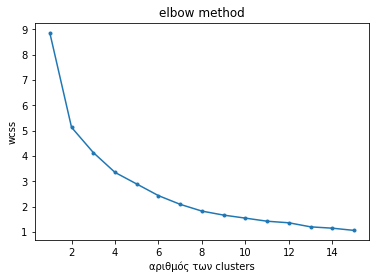

In [10]:
#Δημιουργία διαγραμμάτος
plt.plot(range(1,16),wcss,'.-')
plt.title("elbow method")
plt.xlabel("αριθμός των clusters")
plt.ylabel("wcss")
plt.show()

In [11]:
kmeans =KMeans(n_clusters=4, init ='k-means++',random_state=0) #Αρχικοποίηση αλγόριθμου k-means με τον αριθμό των cluster που βρήκαμε απο την elbow method

In [12]:
y=kmeans.fit_predict(x) #εφαρμογή αγλορίθμου στα δεδομένα,ουσιαστικά το y μας δείχνει σε ποιόν cluster ανήκει το κάθε τραγούδι

In [13]:
print(y)

[0 3 3 2 0 3 0 1 1 3 3 3 3 2 3 3 0 0 2 1 3 2 0 1 1 2 3 3 2 3 1 0 3 0 1 2 3
 3 2 3 1 0 1 3 0 3 1 3 3 3 1 3 2 1 1 1 3 1 1 3 1 1 1 3 3 3 3 3 1 1 3 1 1 1
 0 2 3 1 0 1 2 1 1 3 2 3 3 1 1 1 0 1 2 3 2 3 3 3 3 2]


In [14]:
df = pd.DataFrame({'cluster': y, 'name': name})#Συνδέουμε τα ονόματα των τραγουδίων που είχαμε κραατήσει παραπάνω με τον πίνακα y

In [15]:
print(df)

    cluster                                               name
0         0                                         God's Plan
1         3                                               SAD!
2         3                         rockstar (feat. 21 Savage)
3         2                       Psycho (feat. Ty Dolla $ign)
4         0                                     In My Feelings
5         3                                         Better Now
6         0                                          I Like It
7         1                           One Kiss (with Dua Lipa)
8         1                                              IDGAF
9         3                                            FRIENDS
10        3                                             Havana
11        3                                       Lucid Dreams
12        3                                      Nice For What
13        2                     Girls Like You (feat. Cardi B)
14        3                                         The

In [16]:
cluster0 = df[df["cluster"]==0] #Δημιουργούμε το dataframe για τον cluster0 

In [17]:
print(cluster0)

    cluster                       name
0         0                 God's Plan
4         0             In My Feelings
6         0                  I Like It
16        0       no tears left to cry
17        0                          X
22        0                       Mine
31        0   Solo (feat. Demi Lovato)
33        0                  Nevermind
41        0                       Dura
44        0                   Me Niego
74        0      Him & I (with Halsey)
78        0                   Criminal
90        0  Promises (with Sam Smith)


In [18]:
cluster1=df[df["cluster"]==1]  #Δημιουργούμε το dataframe για τον cluster1 

In [19]:
print(cluster1)

    cluster                                            name
7         1                        One Kiss (with Dua Lipa)
8         1                                           IDGAF
19        1                        Look Alive (feat. Drake)
23        1                                      Youngblood
24        1                                       New Rules
30        1                            Taste (feat. Offset)
34        1                                 ?chame La Culpa
40        1                        River (feat. Ed Sheeran)
42        1                                      SICKO MODE
46        1                 Finesse (Remix) [feat. Cardi B]
50        1                 Ric Flair Drip (& Metro Boomin)
53        1               Freaky Friday (feat. Chris Brown)
54        1                                        Believer
55        1          FEFE (feat. Nicki Minaj & Murda Beatz)
57        1                             Body (feat. brando)
58        1                             

In [20]:
cluster2=df[df["cluster"]==2]  #Δημιουργούμε το dataframe για τον cluster2

In [21]:
print(cluster2)

    cluster                                 name
3         2         Psycho (feat. Ty Dolla $ign)
13        2       Girls Like You (feat. Cardi B)
18        2                            Moonlight
21        2                      Te Bot? - Remix
25        2                         Shape of You
28        2                       Jocelyn Flores
35        2      Eastside (with Halsey & Khalid)
38        2                              changes
52        2                 Too Good At Goodbyes
75        2                          Candy Paint
80        2                 lovely (with Khalid)
84        2  Perfect Duet (Ed Sheeran & Beyonc?)
92        2                     I Like Me Better
94        2   Everybody Dies In Their Nightmares
99        2                           Be Alright


In [22]:
cluster3=df[df["cluster"]==3]  #Δημιουργούμε το dataframe για τον cluster3

In [23]:
print(cluster3)

    cluster                                               name
1         3                                               SAD!
2         3                         rockstar (feat. 21 Savage)
5         3                                         Better Now
9         3                                            FRIENDS
10        3                                             Havana
11        3                                       Lucid Dreams
12        3                                      Nice For What
14        3                                         The Middle
15        3                           All The Stars (with SZA)
20        3  These Days (feat. Jess Glynne, Macklemore & Da...
26        3                           Love Lies (with Normani)
27        3           Meant to Be (feat. Florida Georgia Line)
29        3                                            Perfect
32        3                                       I Fall Apart
36        3                                  Never Be t

In [24]:
print(df)

    cluster                                               name
0         0                                         God's Plan
1         3                                               SAD!
2         3                         rockstar (feat. 21 Savage)
3         2                       Psycho (feat. Ty Dolla $ign)
4         0                                     In My Feelings
5         3                                         Better Now
6         0                                          I Like It
7         1                           One Kiss (with Dua Lipa)
8         1                                              IDGAF
9         3                                            FRIENDS
10        3                                             Havana
11        3                                       Lucid Dreams
12        3                                      Nice For What
13        2                     Girls Like You (feat. Cardi B)
14        3                                         The

In [25]:
print('select a song from the list :') #Καλούμε τον χρήστη να επιλέξει ενα τραγούδι απο την λίστα με τα ονόματα για να δεί πια τραγουδια μοιάζουν με την επιλογή του

select a song from the list :


In [26]:
ans=False

In [27]:
while ans == False: #ελέγχουμε αν το τραγούδι ανήκει στην λίστα, αλλιώς ξανα πληκτρολογεί
    inp=input()
    if df['name'].isin([inp]).any() :
        print('Done')
        ans=True
    else:
      print("Try again :")
        
  
    

SAD!
Done


In [28]:
if cluster0['name'].isin([inp]).any(): #εμφάνιση αποτελεσμάτων 
    print(cluster0)
elif cluster1['name'].isin([inp]).any():
    print(cluster1)
elif cluster2['name'].isin([inp]).any():
    print(cluster2)
else:
    print(cluster3)

    cluster                                               name
1         3                                               SAD!
2         3                         rockstar (feat. 21 Savage)
5         3                                         Better Now
9         3                                            FRIENDS
10        3                                             Havana
11        3                                       Lucid Dreams
12        3                                      Nice For What
14        3                                         The Middle
15        3                           All The Stars (with SZA)
20        3  These Days (feat. Jess Glynne, Macklemore & Da...
26        3                           Love Lies (with Normani)
27        3           Meant to Be (feat. Florida Georgia Line)
29        3                                            Perfect
32        3                                       I Fall Apart
36        3                                  Never Be t